### Metro Nashville Emergency Communications

#### Snickers: Hypothesis: tie between economic status in NW region of Davidson and number of calls received, specifically lack of calls. Very few calls from northwest region of Davidson. Correlate income per zipcode with calls for each storm.

Snickers: North nashville, compare calls/dispatches to full county

#### Timeline of each storm/ Beginning and end of the event
Tornado calls: 3/3/2020 12:34am-4:58am

Tornado cad: 12:36am-4:57am

Derecho calls: 5/3/2020 4:30pm- 5/4/2020 12:29am

Derecho cad: 4:31pm-12:29am

In [167]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import folium
from folium import plugins
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

### Reading in data

In [63]:
derecho_calls=pd.read_csv("../data/911_Phone Calls_Derecho_050320 050420.csv")
tornado_calls=pd.read_csv("../data/911_Phone_Calls_Tornado_030320.csv")
derecho_cad=pd.read_csv("../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv", skiprows=3)
tornado_cad=pd.read_csv("../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv", skiprows=3)
sirens = pd.read_csv('../data/Tornado_Siren_Locations.csv')
dispatch = pd.read_csv('../data/dispatch.csv')
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)

epsg:4326


### Renaming and setting up columns

In [64]:
tornado_calls.columns = ['datetime', 'calltype','lat','lng','address']
derecho_cad.columns = ['datetime', 'calltype','lat','lng','alarm']
tornado_cad.columns = ['datetime', 'calltype','lat','lng','alarm']
derecho_calls.columns = ['datetime', 'calltype','lat','lng','address']
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
dispatch=dispatch[[ 'tencode', 'lat', 'lng', 'call_date','call_time']]

In [65]:
sirens[["lat", "lng"]]= sirens.pop("Location").str.split(", ", n = 1, expand = True)
sirens['lat']= sirens['lat'].str[1:]
sirens['lng'] = sirens['lng'].str[:-1]
sirens=sirens[["Site Name", "Zip","lat","lng"]]

### Creating geometry column for dfs

In [66]:
derecho_calls['geometry'] = derecho_calls.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
tornado_calls['geometry'] = tornado_calls.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
tornado_cad['geometry'] = tornado_cad.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
derecho_cad['geometry'] = derecho_cad.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
dispatch['geometry'] = dispatch.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
sirens['geometry'] = sirens.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

In [67]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
tornado_calls_geo = gpd.GeoDataFrame(tornado_calls, 
                           crs = zipcodes.crs, 
                           geometry = tornado_calls['geometry'])
type(tornado_calls_geo)
derecho_calls_geo = gpd.GeoDataFrame(derecho_calls, 
                           crs = zipcodes.crs, 
                           geometry = derecho_calls['geometry'])
type(derecho_calls_geo)
tornado_cad_geo = gpd.GeoDataFrame(tornado_cad, 
                           crs = zipcodes.crs, 
                           geometry = tornado_cad['geometry'])
type(tornado_cad_geo)
derecho_cad_geo = gpd.GeoDataFrame(derecho_cad, 
                           crs = zipcodes.crs, 
                           geometry = derecho_cad['geometry'])
type(derecho_cad_geo)
dispatch_geo = gpd.GeoDataFrame(dispatch, 
                           crs = zipcodes.crs, 
                           geometry = dispatch['geometry'])
type(dispatch_geo)
sirens_geo = gpd.GeoDataFrame(sirens, 
                           crs = zipcodes.crs, 
                           geometry = dispatch['geometry'])
type(sirens_geo)

geopandas.geodataframe.GeoDataFrame

### Joining dfs

In [69]:
tornado_calls_zip = gpd.sjoin(tornado_calls_geo, zipcodes, op = 'within')
tornado_calls_zip=tornado_calls_zip.reset_index(drop = True)
tornado_cad_zip = gpd.sjoin(tornado_cad_geo, zipcodes, op = 'within')
tornado_cad_zip=tornado_cad_zip.reset_index(drop = True)
derecho_calls_zip = gpd.sjoin(derecho_calls_geo, zipcodes, op = 'within')
derecho_calls_zip=derecho_calls_zip.reset_index(drop = True)
derecho_cad_zip = gpd.sjoin(derecho_cad_geo, zipcodes, op = 'within')
derecho_cad_zip=derecho_cad_zip.reset_index(drop = True)
dispatch_zip = gpd.sjoin(dispatch_geo, zipcodes, op = 'within')
dispatch_zip=dispatch_zip.reset_index(drop = True)

### Drilling down to NW Nash

In [70]:
poly_zip=zipcodes[zipcodes['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
poly_zip=poly_zip.reset_index(drop = True)
tcalls_in_nw = tornado_calls_zip[tornado_calls_zip['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
tcalls_in_nw=tcalls_in_nw.reset_index(drop = True)
tcad_in_nw = tornado_cad_zip[tornado_cad_zip['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
tcad_in_nw=tcad_in_nw.reset_index(drop = True)
dcalls_in_nw = derecho_calls_zip[derecho_calls_zip['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
dcalls_in_nw=dcalls_in_nw.reset_index(drop = True)
dcad_in_nw = derecho_cad_zip[derecho_cad_zip['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
dcad_in_nw=dcad_in_nw.reset_index(drop = True)
sirens_nw=sirens[sirens['Zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]
dispatch_nw=dispatch_zip[dispatch_zip['zip'].isin(['37207', '37072', '37189', '37218','37015','37080'])]

In [55]:
tcalls_in_nw.head()

,datetime,calltype,lat,lng,address,geometry,index_right,zip,po_name
0,3/3/2020 0:41,911 Calls,36.183353,-86.771561,1608 ROSA L PARKS BLVD - E Sector,POINT (-86.77156 36.18335),42,37207,NASHVILLE
1,3/3/2020 0:41,911 Calls,36.220014,-86.806433,615 Moormans Arm RD - Sector NW,POINT (-86.80643 36.22001),42,37207,NASHVILLE
2,3/3/2020 0:44,911 Calls,36.178516,-86.774506,10 C LUCILLE ST - SE SECTOR,POINT (-86.77451 36.17852),42,37207,NASHVILLE
3,3/3/2020 0:45,911 Calls,36.196198,-86.774117,10D LUCILE ST - SECTOR SE,POINT (-86.77412 36.19620),42,37207,NASHVILLE
4,3/3/2020 0:58,911 Calls,36.238552,-86.822548,822 C FLINT RIDGE DR - W Sector,POINT (-86.82255 36.23855),42,37207,NASHVILLE


### Maps

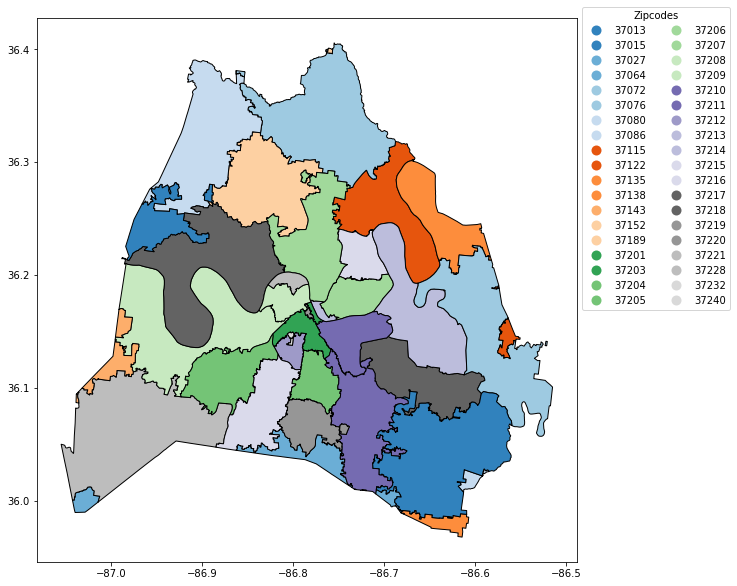

In [134]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20c')
plt.show()

In [110]:
nashville = (36.16784, -86.77816)
nash_map = folium.Map(location =  nashville, zoom_start = 10)

In [125]:
nash_map_nw = folium.Map(location =  nashville, zoom_start = 10)

marker_cluster = MarkerCluster().add_to(nash_map_nw)

folium.GeoJson(poly_zip).add_to(nash_map_nw)

for row_index, row_values in tcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="red",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(marker_cluster)
    
for row_index, row_values in dcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="darkblue",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(marker_cluster)
    
for row_index, row_values in dcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="orange",icon="ambulance", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(marker_cluster)
    
for row_index, row_values in tcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="darkpurple",icon="ambulance", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(marker_cluster)

nash_map_nw.save('../maps/nw_storms_cluster_final.html') 
    
nash_map_nw

In [147]:
nash_map_nw = folium.Map(location =  nashville, zoom_start = 10)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>North West Davidson County Calls vs Dispatches</b></h3>
             '''

folium.GeoJson(poly_zip).add_to(nash_map_nw)

for row_index, row_values in tcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="orange",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in dcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="red",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in dcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="red",icon="tv", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in tcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="orange",icon="tv", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(nash_map_nw)
nash_map_nw.get_root().html.add_child(folium.Element(title_html))    
nash_map_nw.save('../maps/nw_storms_cluster.html') 

nash_map_nw

In [144]:
nash_map_nw = folium.Map(location =  nashville, zoom_start = 10)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>North West Davidson County Calls vs Dispatches</b></h3>
             '''

folium.GeoJson(poly_zip).add_to(nash_map_nw)

for row_index, row_values in tcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="green",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in dcalls_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['calltype'])
    icon=folium.Icon(color="darkblue",icon="phone", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in dcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="blue",icon="ambulance", prefix='fa')
    
    marker = folium.Marker(location = loc,popup = pop,icon = icon)
    marker.add_to(nash_map_nw)
    
for row_index, row_values in tcad_in_nw.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['alarm'])
    icon=folium.Icon(color="green",icon="ambulance", prefix='fa')
    
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(nash_map_nw)
nash_map_nw.get_root().html.add_child(folium.Element(title_html))
    #nash_map_nw.save('../maps/nw_storms.html') 

nash_map_nw

In [155]:
dcad_value = dcad_in_nw['zip'].value_counts()
dcad_value

37207    20
37218     6
37072     5
37080     3
37189     1
Name: zip, dtype: int64

In [156]:
dcalls_value = dcalls_in_nw['zip'].value_counts()
dcalls_value

37207    55
37218    10
37189     6
37080     4
37072     3
Name: zip, dtype: int64

In [157]:
tcalls_value = tcalls_in_nw['zip'].value_counts()
tcalls_value

37207    30
37189     7
37072     3
37218     2
37080     1
Name: zip, dtype: int64

In [158]:
tcad_value = dcad_in_nw['zip'].value_counts()
tcad_value

37207    20
37218     6
37072     5
37080     3
37189     1
Name: zip, dtype: int64

In [161]:
t_divide=tcad_value/tcalls_value
t_divide

37072    1.666667
37080    3.000000
37189    0.142857
37207    0.666667
37218    3.000000
Name: zip, dtype: float64

In [162]:
d_divide=dcad_value/dcalls_value
d_divide

37072    1.666667
37080    0.750000
37189    0.166667
37207    0.363636
37218    0.600000
Name: zip, dtype: float64

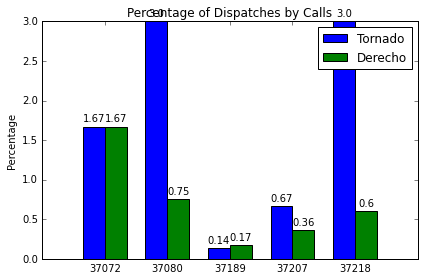

In [204]:
labels = ['37072', '37080', '37189', '37207', '37218']
t_means = [1.67, 3.0, 0.14, 0.67, 3.0]
d_means = [1.67, 0.75, 0.17, 0.36, 0.6]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, t_means, width, label='Tornado')
rects2 = ax.bar(x + width/2, d_means, width, label='Derecho')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Dispatches by Calls')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

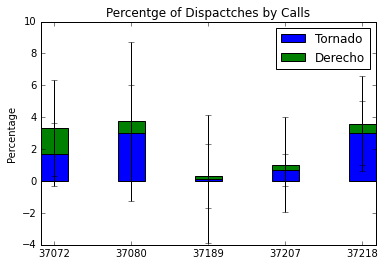

In [193]:
labels = ['37072', '37080', '37189', '37207', '37218']
t_means = [1.67, 3.0, 0.14, 0.67, 3.0]
d_means = [1.67, 0.75, 0.17, 0.36, 0.6]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, t_means, width, yerr=men_std, label='Tornado')
ax.bar(labels, d_means, width, yerr=women_std, bottom=t_means,
       label='Derecho')

ax.set_ylabel('Percentage')
ax.set_title('Percentge of Dispactches by Calls')
ax.legend()

plt.show()

<BarContainer object of 5 artists>

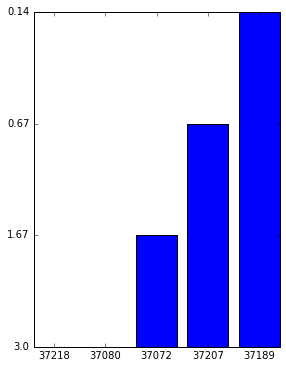

In [190]:
names=['37218','37080','37072','37207','37189']
values=['3.0','3.0','1.67','0.67','0.14']
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.bar(names, values)